<a href="https://colab.research.google.com/github/scottthomaswx/pull-space-wx-data/blob/main/Pull_DSCVR_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
# @title
!pip install xarray
!pip install matplotlib
!pip install numpy
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

####Pull wget from this link
https://www.ngdc.noaa.gov/dscovr/portal/index.html#/download/1691107200000;1691280000000/f1m;m1m

In [258]:
%%capture
!wget https://www.ngdc.noaa.gov/dscovr/data/2024/10/oe_f1m_dscovr_s20241010000000_e20241010235959_p20241011021042_pub.nc.gz https://www.ngdc.noaa.gov/dscovr/data/2024/10/oe_m1m_dscovr_s20241010000000_e20241010235959_p20241011020554_pub.nc.gz https://www.ngdc.noaa.gov/dscovr/data/2024/10/oe_f1m_dscovr_s20241011000000_e20241011235959_p20241012021042_pub.nc.gz https://www.ngdc.noaa.gov/dscovr/data/2024/10/oe_m1m_dscovr_s20241011000000_e20241011235959_p20241012020553_pub.nc.gz

In [262]:
!gunzip /content/oe_m1m_dscovr_s20241011000000_e20241011235959_p20241012020553_pub.nc.gz

In [263]:
b_data = xr.open_mfdataset(f'*m1m*')
s_data = xr.open_mfdataset(f'*f1m*')

In [264]:
start_time = '2024-10-10T18:00:00.000000000'
end_time = '2024-10-11T06:00:00.000000000'

bt = b_data['bt']
bt = bt.sel(time=slice(start_time, end_time))
bx = b_data['bx_gse']
bx = bx.sel(time=slice(start_time, end_time))
by = b_data['by_gse']
by = by.sel(time=slice(start_time, end_time))
bz = b_data['bz_gse']
bz = bz.sel(time=slice(start_time, end_time))

sp = s_data['proton_speed']
sp = sp.sel(time=slice(start_time, end_time))

dn = s_data['proton_density']
dn = dn.sel(time=slice(start_time, end_time))

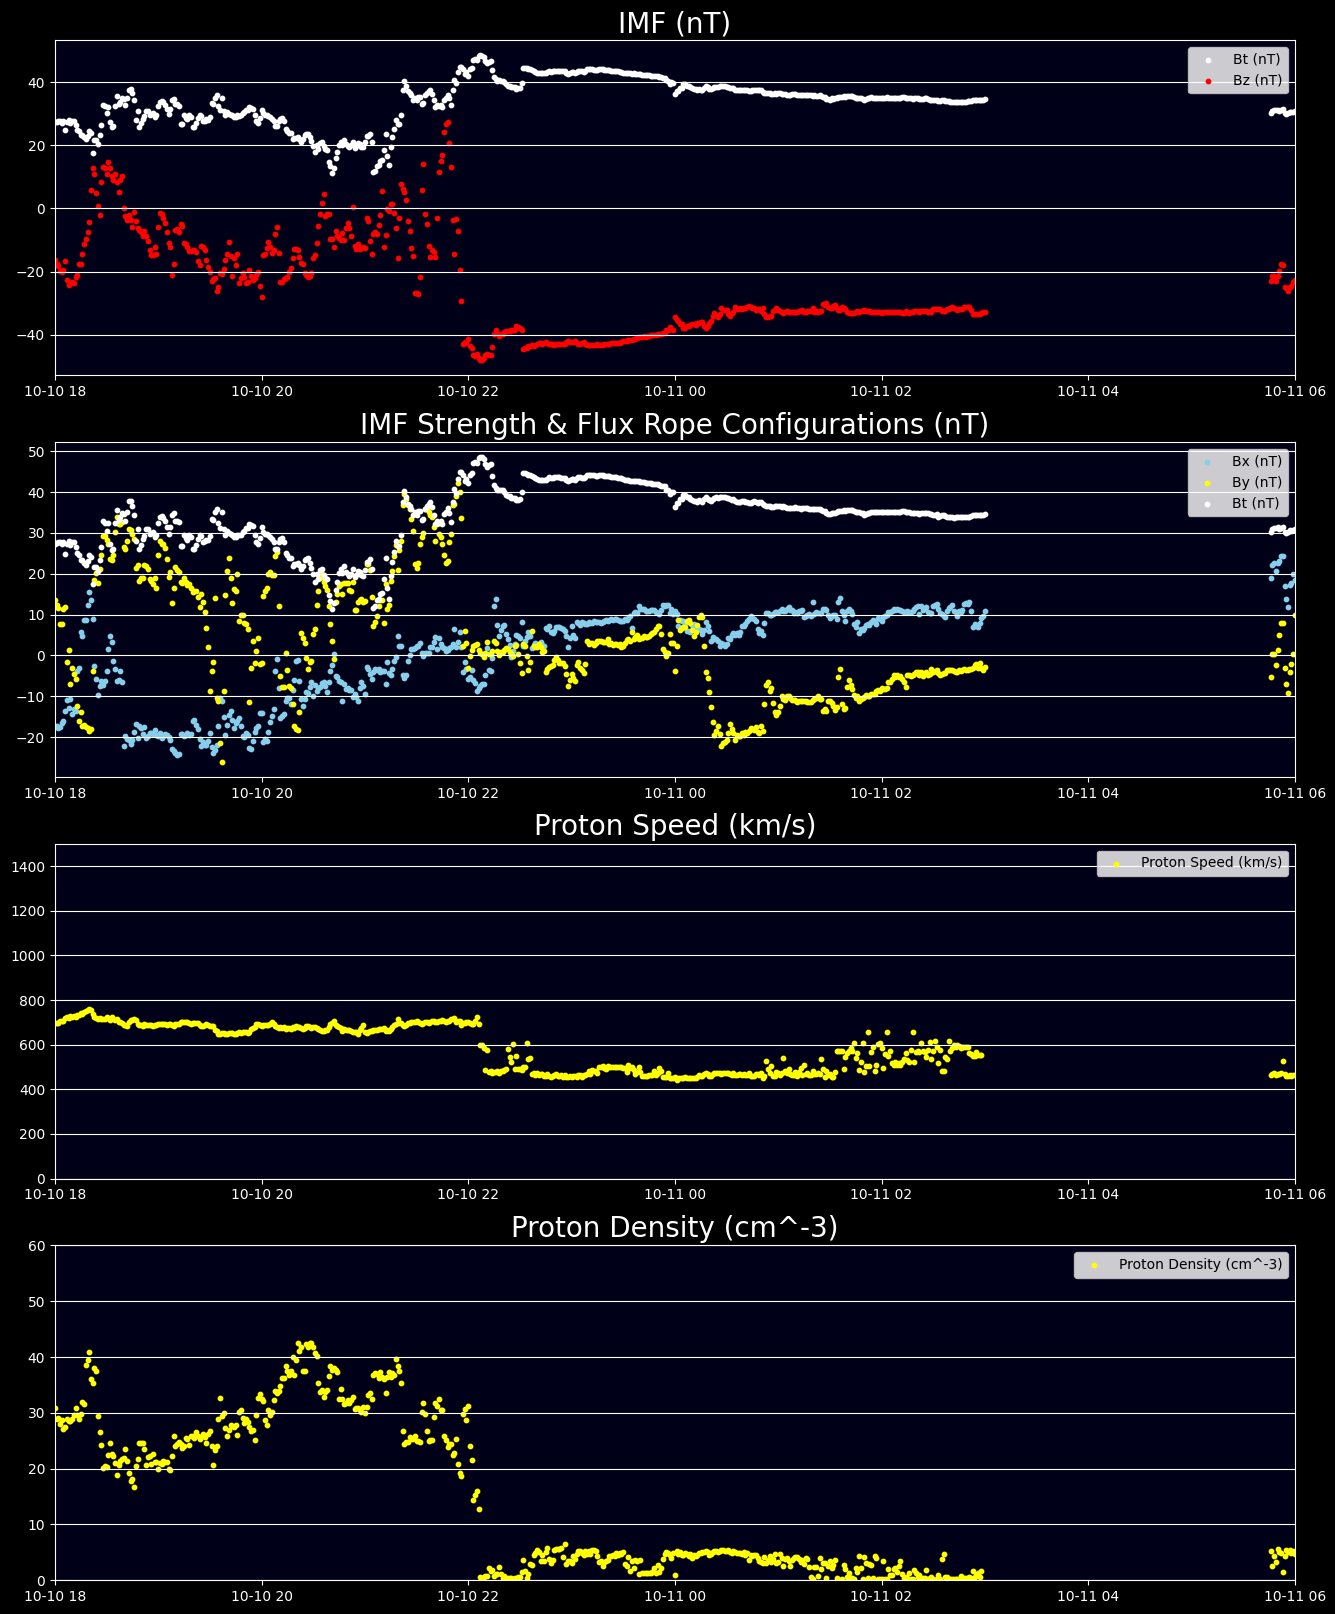

In [265]:
plt.figure(figsize=(16, 20), facecolor= 'black')

ax1 = plt.subplot(4, 1, 1, facecolor = '#000019')
ax1.scatter(bt.time, bt.values, color = 'white', label='Bt (nT)', s = 10)
ax1.scatter(bz.time, bz.values, color = 'red', label='Bz (nT)', s = 10)
ax1.spines['bottom'].set_color('white')
ax1.spines['top'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
if bz.values.min() > -20:
  ax1.set_ylim(-25,25)
  ax1.set_yticks(np.arange(-25, 26, 5))
elif bz.values.min() < -20 and bz.values.min() > -40:
  ax1.set_ylim(-50,50)
  ax1.set_yticks(np.arange(-50, 51, 10))
elif bz.values.min() < -40 and bz.values.min() > -60:
  ax1.set_ylim(-75,75)
  ax1.set_yticks(np.arange(-75, 76, 10))
elif bz.values.min() < -80:
  ax1.set_ylim(-100,100)
  ax1.set_yticks(np.arange(-100, 101, 10))

ax1.set_xlim(bt.time[0], bt.time[-1])
ax1.grid(axis = 'y', color='white')
ax1.set_title('IMF (nT)', color='white', size = 20)
ax1.legend()

ax2 = plt.subplot(4, 1, 2, facecolor = '#000019')
ax2.scatter(bx.time, bx.values, color = 'skyblue', label='Bx (nT)', s = 10)
ax2.scatter(by.time, by.values, color = 'yellow', label='By (nT)', s = 10)
ax2.scatter(bt.time, bt.values, color = 'white', label='Bt (nT)', s = 10)
ax2.spines['bottom'].set_color('white')
ax2.spines['top'].set_color('white')
ax2.spines['right'].set_color('white')
ax2.spines['left'].set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
if bt.values.max() < 20:
  ax2.set_ylim(-25,25)
  ax2.set_yticks(np.arange(-25, 26, 5))
elif bt.values.max() > 20 and bt.values.max() < 40:
  ax2.set_ylim(-50,50)
  ax2.set_yticks(np.arange(-50, 51, 10))
elif bt.values.max() > 40 and bt.values.max() > 60:
  ax2.set_ylim(-75,75)
  ax2.set_yticks(np.arange(-75, 76, 10))
elif bt.values.max() > -80:
  ax2.set_ylim(-100,100)
  ax2.set_yticks(np.arange(-100, 101, 10))

ax2.set_xlim(bt.time[0], bt.time[-1])
ax2.grid(axis = 'y', color='white')
ax2.set_title('IMF Strength & Flux Rope Configurations (nT)', color='white', size = 20)
ax2.legend()

ax3  = plt.subplot(4, 1, 3, facecolor = '#000019')
ax3.scatter(sp.time, sp.values, color = 'yellow', label='Proton Speed (km/s)', s = 10)
ax3.spines['bottom'].set_color('white')
ax3.spines['top'].set_color('white')
ax3.spines['right'].set_color('white')
ax3.spines['left'].set_color('white')
ax3.tick_params(axis='x', colors='white')
ax3.tick_params(axis='y', colors='white')
ax3.set_xlim(sp.time[0], sp.time[-1])
ax3.set_ylim(0, 1500)
ax3.grid(axis = 'y', color='white')
ax3.set_title('Proton Speed (km/s)', color='white', size = 20)
ax3.legend()

ax4 = plt.subplot(4, 1, 4, facecolor = '#000019')
ax4.scatter(dn.time, dn.values, color = 'yellow', label='Proton Density (cm^-3)', s = 10)
ax4.spines['bottom'].set_color('white')
ax4.spines['top'].set_color('white')
ax4.spines['right'].set_color('white')
ax4.spines['left'].set_color('white')
ax4.tick_params(axis='x', colors='white')
ax4.tick_params(axis='y', colors='white')
ax4.set_xlim(dn.time[0], dn.time[-1])
ax4.set_ylim(0, 60)
ax4.grid(axis = 'y', color='white')
ax4.set_title('Proton Density (cm^-3)', color='white', size = 20)
ax4.legend()

plt.show()